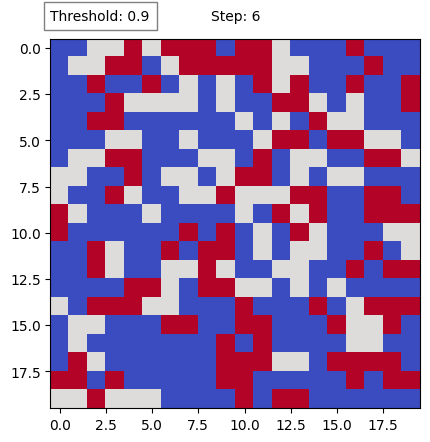

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
%matplotlib inline


class Agent:
    def __init__(self):
        self.agent_type = random.choice([1, 2])  # TYPE_A: 1, TYPE_B: 2
        self.position = None

    def set_position(self, x, y):
        self.position = (x, y)

    def count_neighbors(self, grid):
        same_count = 0
        different_count = 0
        x, y = self.position
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if (dx != 0 or dy != 0):
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                        if grid[nx, ny] == self.agent_type:
                            same_count += 1
                        elif grid[nx, ny] != 0:  # EMPTY: 0
                            different_count += 1
        return same_count, different_count

    def calculate_different_ratio(self, grid):
        same_neighbors, different_neighbors = self.count_neighbors(grid)
        total_neighbors = same_neighbors + different_neighbors
        same_ratio = same_neighbors / total_neighbors if total_neighbors > 0 else 0
        return 1 - same_ratio

    def move(self, grid):
        empty_positions = [(i, j) for i in range(grid.shape[0])
                           for j in range(grid.shape[1]) if grid[i, j] == 0]  # EMPTY: 0
        if empty_positions:
            new_x, new_y = random.choice(empty_positions)
            grid[new_x, new_y] = self.agent_type
            grid[self.position] = 0  # EMPTY: 0
            self.set_position(new_x, new_y)


class Environment:
    def __init__(self, grid_size, agent_ratio, threshold):
        self.grid_size = grid_size
        self.agent_ratio = agent_ratio
        self.threshold = threshold
        self.agents = []
        self.history = []
        self.grid = self.initialize_grid()

    def initialize_grid(self):
        num_agents = int(self.grid_size * self.grid_size * self.agent_ratio)
        grid = np.full((self.grid_size, self.grid_size), 0)  # EMPTY: 0

        for _ in range(num_agents):
            x, y = random.randint(0, self.grid_size -
                                  1), random.randint(0, self.grid_size - 1)
            while grid[x, y] != 0:  # 空いている位置を探す
                x, y = random.randint(
                    0, self.grid_size - 1), random.randint(0, self.grid_size - 1)
            agent = Agent()
            grid[x, y] = agent.agent_type
            agent.set_position(x, y)
            self.agents.append(agent)

        self.history.append(grid.copy())
        return grid

    def update(self):
        new_grid = self.grid.copy()
        for agent in self.agents:
            diff_ratio = agent.calculate_different_ratio(self.grid)
            if diff_ratio > self.threshold:
                agent.move(new_grid) 
        
        if np.array_equal(self.grid, new_grid):
            return False
        else:
            self.grid = new_grid
            self.history.append(new_grid.copy())
            return True
        



def run_simulation(grid_size=20, agent_ratio=0.5, threshold=0.6):
    env = Environment(grid_size, agent_ratio, threshold)
    steps = 0
    while True:
        steps += 1
        if not env.update():
            break

    return env.history


def animate_simulation(history, threshold=None, save_path=None):

    fig, ax = plt.subplots()
    # ims = []

    # for step, grid in enumerate(history):
    #     # im = ax.imshow(grid, cmap='coolwarm', vmin=0, vmax=2)
    #     ax.set_title(f'Step: {step + 1}')  # ステップ数を表示
    #     im = ax.imshow(grid, cmap='coolwarm', vmin=0, vmax=2)
    #     ims.append([im])

    # anim = animation.ArtistAnimation(fig, ims, interval=300, repeat=False)

    def animate(frame):
        ax.clear()  # 前のフレームをクリア
        ax.imshow(history[frame], cmap='coolwarm', vmin=0, vmax=2)
        ax.text(0.5, 1.05, f'Step: {frame + 1}',
                # bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5},
                transform=ax.transAxes, ha="center")
        ax.text(0, 1.05, f'Threshold: {threshold}',
                bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5},
                transform=ax.transAxes, ha="left")
    
    anim = animation.FuncAnimation(fig, animate, frames=len(history), interval=300, repeat=False)

    if save_path:
        anim.save(save_path, writer='imagemagick')
    plt.show()


# シミュレーションを実行
threshold = 0.9
history = run_simulation(grid_size=20, agent_ratio=0.5, threshold=threshold)
animate_simulation(history, threshold=threshold, save_path=f'shelling_segregation_{threshold}.gif')
